#Hand  Written Digit Prediction - Classification Analysis

The digits dataset consists of 8x8 pixel images of digits. the images attribute of the dataset stores 8x8 arrays of grayscale values for each image. we will use these arrays to visualize the dirst 4 images. the target attribute of the dataset stores the digit each image represents

##Data Source - [Hand Digit](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

##Import Library

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

##Import Data

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df = load_digits()

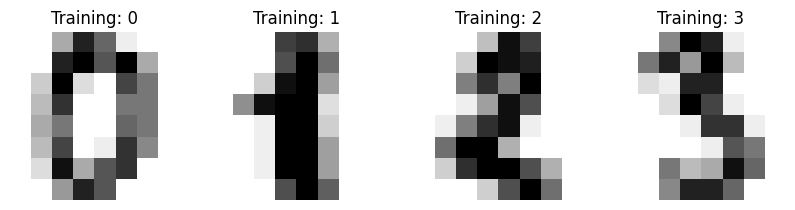

In [ ]:
_, axex = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axex, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.set_title('Training: %i' % label)

##Data Preprocessing


In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

## Scaling Image Data

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data = data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

##Train Test Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

##Predict Test Data

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
y_pred

array([3, 3, 0, 8, 9, 7, 2, 5, 4, 7, 4, 9, 6, 2, 8, 3, 7, 5, 2, 6, 1, 9,
       5, 7, 1, 4, 1, 2, 2, 7, 5, 0, 5, 9, 5, 9, 4, 4, 2, 1, 9, 4, 2, 8,
       2, 3, 9, 7, 3, 3, 8, 8, 1, 7, 4, 8, 2, 5, 7, 9, 9, 9, 6, 0, 7, 5,
       6, 9, 5, 9, 8, 3, 3, 2, 8, 2, 0, 7, 4, 0, 3, 6, 6, 3, 7, 1, 9, 0,
       6, 2, 2, 4, 9, 5, 2, 9, 9, 4, 9, 6, 3, 7, 3, 2, 6, 9, 5, 3, 5, 7,
       6, 1, 6, 4, 4, 2, 0, 6, 1, 4, 6, 3, 4, 7, 7, 2, 9, 6, 4, 1, 6, 0,
       3, 5, 6, 5, 3, 6, 2, 2, 4, 8, 5, 3, 5, 4, 7, 4, 2, 3, 4, 8, 1, 0,
       5, 4, 4, 6, 3, 9, 4, 2, 0, 9, 0, 3, 4, 8, 0, 3, 2, 7, 6, 0, 5, 1,
       1, 1, 7, 4, 0, 1, 0, 3, 5, 1, 2, 2, 2, 9, 2, 5, 6, 9, 8, 1, 6, 0,
       6, 6, 8, 3, 3, 4, 2, 7, 8, 1, 6, 9, 3, 6, 0, 9, 3, 9, 3, 6, 0, 5,
       6, 0, 9, 7, 5, 1, 0, 4, 5, 3, 5, 7, 6, 6, 3, 8, 6, 8, 2, 4, 3, 2,
       9, 0, 9, 7, 8, 5, 7, 9, 9, 1, 8, 4, 1, 4, 8, 8, 1, 8, 0, 7, 0, 8,
       6, 3, 1, 1, 5, 6, 4, 2, 3, 2, 5, 9, 9, 3, 6, 8, 4, 7, 3, 2, 2, 1,
       3, 0, 6, 0, 3, 6, 0, 7, 6, 0, 1, 9, 9, 3, 3,

##Model Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[55,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 59,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 48,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  0, 61,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  1,  0,  0,  0,  0, 46,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 54]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.98      0.98      0.98        57
           2       0.98      1.00      0.99        59
           3       0.95      1.00      0.97        53
           4       0.98      1.00      0.99        54
           5       1.00      0.94      0.97        51
           6       1.00      1.00      1.00        61
           7       1.00      1.00      1.00        45
           8       0.98      0.92      0.95        50
           9       0.96      0.98      0.97        55

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.98      0.98      0.98        57
           2       0.98      1.00      0.99        59
           3       0.95      1.00      0.97        53
           4       0.98      1.00      0.99        54
           5       1.00      0.94      0.97        51
           6       1.00      1.00      1.00        61
           7       1.00      1.00      1.00        45
           8       0.98      0.92      0.95        50
           9       0.96      0.98      0.97        55

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



##Explaination
A Random Forest Classifier model is created and trained on the training data.

The trained model is used to predict the digits on the testing set, and the model's performance is evaluated using a confusion matrix and classification report.

Here is a breakdown

import Libraries:

pandas: Used for data manipulation and analysis.

numpy: Used for numerical operations on arrays.

matplotlib.pyplot: Used for creating visualizations.

sklearn.datasets: Used to load the handwritten digits dataset.

sklearn.model_selection.train_test_split: Used to split the data into training and testing sets.

sklearn.ensemble.RandomForestClassifier: The machine learning model used for classification.

sklearn.metrics.confusion_matrix, classification_report: Used to evaluate the performance of the model.

Load and Visualize Data:

The handwritten digits dataset is loaded using load_digits().

The first four images are displayed using matplotlib to visualize the data.

Preprocess Data:

Reshape Images: The images are reshaped from 8x8 arrays to a flat array of 64 features using reshape((n_samples, -1)).

Scale Pixel Values: The pixel values are scaled from a range of 0-16 to 0-1 by dividing by 16. This helps improve the performance of the machine learning model.

Split Data:

The data is split into training and testing sets using train_test_split with a test size of 30%.

Train Model:

A Random Forest Classifier model is created using RandomForestClassifier().

The model is trained on the training data using fit(X_train, y_train).

Predict and Evaluate:

The trained model is used to predict the digits on the testing set using predict(X_test).

A confusion matrix is generated using confusion_matrix(y_test, y_pred) to visualize the model's performance.

A classification report is generated using classification_report(y_test, y_pred) to provide a detailed evaluation of the model's precision, recall, F1-score, and support for each digit class.